In [2]:
import json
import pandas as pd
from datasets import load_from_disk


data = json.load(open('../data/raw/wikipedia_documents.json'))
wiki = pd.DataFrame(data).T

dataset = load_from_disk("../data/raw/train_dataset/")
train_df = pd.DataFrame(dataset['train'])
valid_df = pd.DataFrame(dataset['validation'])

mrc = pd.concat([train_df, valid_df])

wiki.shape, mrc.shape

/opt/conda/envs/llm/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


((60613, 8), (4192, 7))

In [9]:
dataset = load_from_disk("../data/raw/test_dataset/")
dataset
# to pd
test_df = pd.DataFrame(dataset['validation'])
test_df

,question,id
0,유령'은 어느 행성에서 지구로 왔는가?,mrc-1-000653
1,용병회사의 경기가 좋아진 것은 무엇이 끝난 이후부터인가?,mrc-1-001113
2,돌푸스에게 불특정 기간동안 하원이 잠시 쉬는 것을 건의 받았던 인물은?,mrc-0-002191
3,"마오리언어와 영어, 뉴질랜드 수화를 공식 언어로 사용하는 나라는?",mrc-0-003951
4,디엔비엔푸 전투에서 보응우옌잡이 상대한 국가는?,mrc-1-001272
...,...,...
595,타입 2 가이아 메모리을 만든 집단은?,mrc-0-002989
596,장면이 정치보복에 반대하는 입장에서 처벌을 원치 않은 대상은?,mrc-0-001804
597,"콜드게임 중 어떠한 계기로 인해 잠시 중단된 뒤, 익일에 게임이 진행되는 것은?",mrc-0-003411
598,제2캐나다기갑여단이 상륙한 곳은?,mrc-0-003436


In [2]:
mrc.head(1)

,title,context,question,id,answers,document_id,__index_level_0__
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42


In [10]:
mrc['answer_location_ratio'] = mrc.apply(lambda x: (x['answers']['answer_start'][0] / len(x['context']))*100, axis=1)
mrc

,title,context,question,id,answers,document_id,__index_level_0__,answer_location_ratio
0,미국 상원,미국 상의원 또는 미국 상원(United States Senate)은 양원제인 미국...,대통령을 포함한 미국의 행정부 견제권을 갖는 국가 기관은?,mrc-1-000067,"{'answer_start': [235], 'text': ['하원']}",18293,42,27.262181
1,인사조직관리,'근대적 경영학' 또는 '고전적 경영학'에서 현대적 경영학으로 전환되는 시기는 19...,현대적 인사조직관리의 시발점이 된 책은?,mrc-0-004397,"{'answer_start': [212], 'text': ['《경영의 실제》']}",51638,2873,34.138486
2,강희제,강희제는 강화된 황권으로 거의 황제 중심의 독단적으로 나라를 이끌어 갔기에 자칫 전...,강희제가 1717년에 쓴 글은 누구를 위해 쓰여졌는가?,mrc-1-000362,"{'answer_start': [510], 'text': ['백성']}",5028,230,60.000000
3,금동삼존불감,"불상을 모시기 위해 나무나 돌, 쇠 등을 깎아 일반적인 건축물보다 작은 규모로 만든...",11~12세기에 제작된 본존불은 보통 어떤 나라의 특징이 전파되었나요?,mrc-0-001510,"{'answer_start': [625], 'text': ['중국']}",34146,992,85.969739
4,계사명 사리구,동아대학교박물관에서 소장하고 있는 계사명 사리구는 총 4개의 용기로 구성된 조선후기...,명문이 적힌 유물을 구성하는 그릇의 총 개수는?,mrc-0-000823,"{'answer_start': [30], 'text': ['4개']}",47334,548,4.926108
...,...,...,...,...,...,...,...,...
235,전단 (제나라),"연나라 군대의 사령관이 악의에서 기겁으로 교체되자, 전단은 스스로 신령의 계시를 받...",전단이 연나라와의 전쟁에서 승리했을 당시 제나라의 왕은 누구인가?,mrc-0-000484,"{'answer_start': [1084], 'text': ['제 양왕']}",53265,329,86.443381
236,티칼,현재 우리가 볼 수 있는 티칼의 모습은 펜실베이니아 대학교와 과테말라 정부의 협조 ...,공놀이 경기장 중 일부는 어디에 위치하고 있나?,mrc-0-002095,"{'answer_start': [343], 'text': [''일곱 개의 신전 광장...",12190,1378,38.238573
237,윤치호,1940년 5월 1일 오전 창씨개명에 비협조적이라는 이유로 조선총독부 경무국에서 소...,창씨개명령의 시행일을 미루는 것을 수락한 인물은?,mrc-0-003083,"{'answer_start': [247], 'text': ['미나미 지로']}",5326,2031,18.797565
238,신잉카국,빌카밤바 지역은 파차쿠티 황제 때 부터 잉카 제국에 속해있던 지역이었다. 스페인 군...,망코 잉카가 쿠스코를 되찾기 위해 마련한 군사는 총 몇 명인가?,mrc-0-002978,"{'answer_start': [563], 'text': ['200,000명']}",48575,1963,56.412826


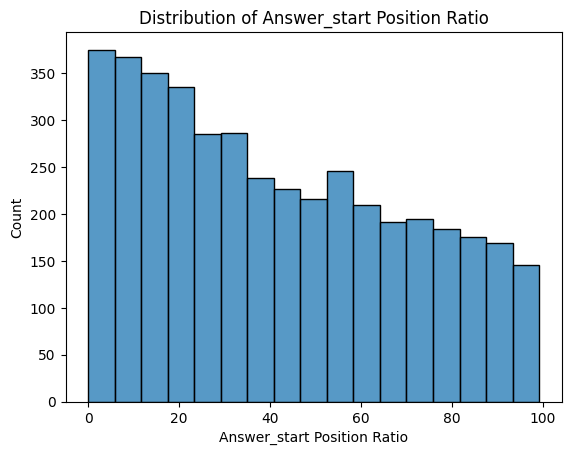

In [15]:
# visualize the distribution of answer location ratio

import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(mrc['answer_location_ratio'])
plt.title('Distribution of Answer_start Position Ratio')
x = plt.xlabel('Answer_start Position Ratio')
plt.show()


In [16]:
mrc_sorted = mrc.sort_values(by='answer_location_ratio', ascending=False)
mrc_sorted.head(1)

,title,context,question,id,answers,document_id,__index_level_0__,answer_location_ratio
2749,이연희 (종교인),이연희는 순교자 남명혁 다미아노의 부인이다. 그녀는 매우 강한 의지를 가진 매우 영...,남명혁 부인의 사망 당시 나이는?,mrc-0-002123,"{'answer_start': [708], 'text': ['36세']}",39032,1394,99.159664


In [17]:
mrc_sorted['context'].iloc[0]

'이연희는 순교자 남명혁 다미아노의 부인이다. 그녀는 매우 강한 의지를 가진 매우 영리한 여성이었다. 그녀도 권희 바르바라와 마찬가지로 당시의 위험을 무릅쓰고 앵베르 주교와 선교사들을 기꺼이 받아들여 그들에게 숙식을 제공했다. 사람들이 그녀의 집에 모여들면, 그녀는 그들을 돌보며 가르쳤고 그들이 성사를 볼 수 있도록 도왔다. 그녀의 친절과 겸손은 주위의 모든 사람들을 기쁘게 하였다.\\n\\n1839년에 그녀가 체포되었을 때, 그녀는 36세였다. 감옥에서 그녀는 형졸들에게 고문 받았다. 그녀가 그들의 무례함을 꾸짖자, 남편 남명혁은 그녀에게 천주교 신자는 순한 양처럼 죽어야 한다고 충고하였다. 그 후 그녀는 어떠한 학대나 잔혹 행위라도 불평없이 견뎠다.\\n\\n그녀의 12살 된 아들이 다른 옥방에 갖혀 있었는데, 형졸들은 그를 고문하며 그녀가 아들의 비명을 들을 수 있도록 했다. 형졸들은 그녀에게 아이가 어떻게 고문 받는지를 말해주었다. 그녀는 행여나 아들이 고문에 굴복하여 자신의 신앙을 버릴까 염려하였지만, 모든 시련은 하느님의 가장 위대한 영광을 위한 것이라고 말하며 스스로를 안심시켰다. 그녀는 가혹한 형벌과 고문을 받으면서도 마음 속 깊은 곳에서부터 하느님을 사랑하며 자신이 원하는 것은 오직 천국 뿐이라고 증언하였다.\\n\\n그녀는 1839년 9월 3일에 서소문 밖에서 다섯 명의 교우와 함께 참수 되었다. 그녀가 신앙을 위하여 목숨을 바쳤을 때 나이 36세였다.'

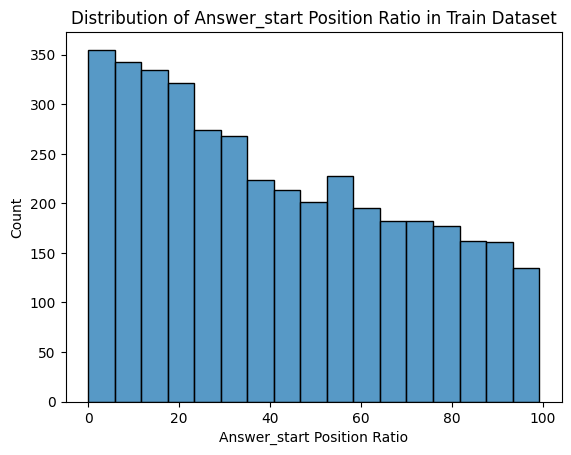

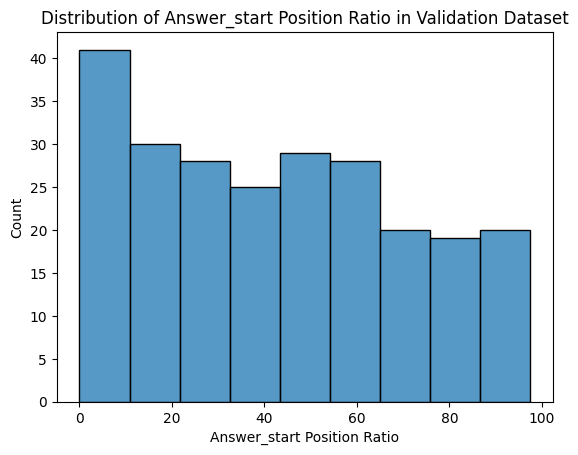

In [18]:
train_df['answer_location_ratio'] = train_df.apply(lambda x: (x['answers']['answer_start'][0] / len(x['context']))*100, axis=1)
valid_df['answer_location_ratio'] = valid_df.apply(lambda x: (x['answers']['answer_start'][0] / len(x['context']))*100, axis=1)
sns.histplot(train_df['answer_location_ratio'])
plt.title('Distribution of Answer_start Position Ratio in Train Dataset')
x = plt.xlabel('Answer_start Position Ratio')
plt.show()

sns.histplot(valid_df['answer_location_ratio'])
plt.title('Distribution of Answer_start Position Ratio in Validation Dataset')
x = plt.xlabel('Answer_start Position Ratio')
plt.show()

In [20]:
mrc['context_length'] = mrc['context'].apply(lambda x: len(x))
mrc['question_length'] = mrc['question'].apply(lambda x: len(x))
mrc['context_length'].describe()

count    4192.000000
mean      920.020515
std       356.661266
min       512.000000
25%       643.000000
50%       819.000000
75%      1100.250000
max      2064.000000
Name: context_length, dtype: float64

In [21]:
mrc['question_length'].describe()

count    4192.000000
mean       29.315124
std         8.726480
min         8.000000
25%        23.000000
50%        29.000000
75%        35.000000
max        78.000000
Name: question_length, dtype: float64